In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from nbody import Particles, NbodySimulation

# Sun-Earth System

In this notebook, we will test our Solar System (Sun + Earth) simulation.\
For convenice, that's define the `problem_name` here for handling data IO.

In [2]:
problem_name = "solar_earth"

Prepare physical constants

In [3]:
msun   = 1.989e33   # gram
mearth = 5.97219e27 # gram
au     = 1.496e13   # cm
day    = 86400      # sec
year   = 365*day    # sec
G      = 6.67e-8   # cgs

Re-implment the particle initialze condition of the Sun+Earth system. 

In [4]:
def initialSolarSystem(particles:Particles):
    """
    initial Sun-Earth system
    """
    # TODO:
    msun   = 1.989e33   # gram
    mearth = 5.97219e27 # gram
    G      = 6.67e-8   # cgs
    seperation    = 1.496e13   # cm
    period = np.sqrt(4 * np.pi**2 * seperation**3/(G*(msun+mearth)))
    xsun = -mearth/(msun+mearth)*seperation
    xearth = msun/(msun+mearth)*seperation
    vsun = 2*np.pi*xsun/period
    vearth =  -2*np.pi*xearth/period
    force = G*msun*mearth/seperation
    asun = force / msun
    aearth = force / mearth
    

    masses = particles.get_masses()
    masses[0,0] = msun
    masses[1,0] = mearth

    positions = particles.get_positions()
    positions[0,0] = xsun
    positions[1,0] = xearth

    velocities = particles.get_velocities()
    velocities[0,1] = vsun
    velocities[1,1] = vearth

    accelerations = particles.get_accelerations()
    accelerations[0,0] = asun
    accelerations[1,0] = aearth

    particles.set_masses(masses)
    particles.set_positions(positions)
    particles.set_velocities(velocities)
    particles.set_accelerations(accelerations)
    return particles

Once we initialize the particles, we could run our simulation by

In [5]:
particles = Particles(N=2)
particles = initialSolarSystem(particles)
sim = NbodySimulation(particles)
sim.setup(G=G,method="Euler",io_freq=20,io_title=problem_name,io_screen=False,visualized=False)
sim.evolve(dt=0.1*day,tmax=2*year)

TypeError: not enough arguments: expected 8, got 2

# Load data and Visualization

note: `conda install -c conda-forge ffmpeg` might be necessary

In [ ]:
import glob

In [ ]:
fns = "data_"+problem_name+"/data_"+problem_name+"_[0-9][0-9][0-9][0-9][0-9].txt"
fns = glob.glob(fns)
fns.sort()
#print(fns) 

loadtxt done data_solar_earth/data_solar_earth_00000.txt
loadtxt done data_solar_earth/data_solar_earth_00020.txt
loadtxt done data_solar_earth/data_solar_earth_00040.txt
loadtxt done data_solar_earth/data_solar_earth_00060.txt
loadtxt done data_solar_earth/data_solar_earth_00080.txt
loadtxt done data_solar_earth/data_solar_earth_00100.txt
loadtxt done data_solar_earth/data_solar_earth_00120.txt
loadtxt done data_solar_earth/data_solar_earth_00140.txt
loadtxt done data_solar_earth/data_solar_earth_00160.txt
loadtxt done data_solar_earth/data_solar_earth_00180.txt
loadtxt done data_solar_earth/data_solar_earth_00200.txt
loadtxt done data_solar_earth/data_solar_earth_00220.txt
loadtxt done data_solar_earth/data_solar_earth_00240.txt
loadtxt done data_solar_earth/data_solar_earth_00260.txt
loadtxt done data_solar_earth/data_solar_earth_00280.txt
loadtxt done data_solar_earth/data_solar_earth_00300.txt
loadtxt done data_solar_earth/data_solar_earth_00320.txt
loadtxt done data_solar_earth/d

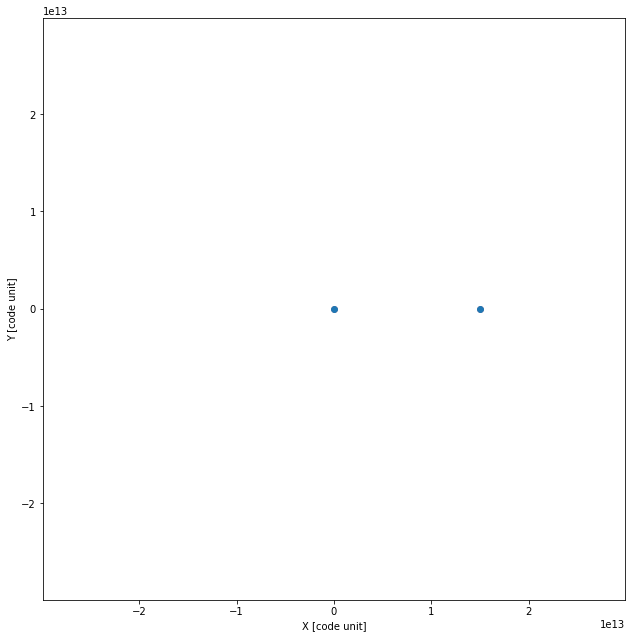

In [ ]:
scale = 2 * au

fig, ax =plt.subplots()
fig.set_size_inches(10.5, 10.5, forward=True)
fig.set_dpi(72)
ol,   = ax.plot([0,au],[0,0],'ro',alpha=0.3) # the initial conditions
line, = ax.plot([],[],'o')                   # plots of particles

def init():
    ax.set_xlim(-scale,scale)
    ax.set_ylim(-scale,scale)
    ax.set_aspect('equal')
    ax.set_xlabel('X [code unit]')
    ax.set_ylabel('Y [code unit]')
    return line,

def updateParticles(frame):
    fn = fns[frame]
    m,t,x,y,z,vx,vy,vz,ax,ay,az = np.loadtxt(fn)
    print("loadtxt done",fn)
    line.set_data(x,y)
    return line,

ani = animation.FuncAnimation(fig, updateParticles, frames=len(fns),init_func=init, blit=True)
ani.save('movie_'+problem_name+'.mp4',fps=10)